In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Models
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV,LassoCV,Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from math import exp

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
train_ID = df_train['Id']
test_ID = df_test['Id']
y_train=y = df_train['SalePrice']

In [5]:
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
df_train.select_dtypes(include=['int64','float64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [6]:
df_train.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


Checking out the number of Categorical Data and Numerical data and adding them up to find out the total feature types

In [7]:
categorical=len(df_train.select_dtypes(include=['object']).columns)
numbers=len(df_train.select_dtypes(include=['float64','int64']).columns)
print("Total number of Categorical Data is:",categorical)
print("Total number of Numerical Data is:",numbers)
print("Total Features are:",categorical+numbers)

Total number of Categorical Data is: 43
Total number of Numerical Data is: 37
Total Features are: 80


In [8]:
df_train.shape

(1460, 80)

In [9]:
df_test.shape

(1459, 79)

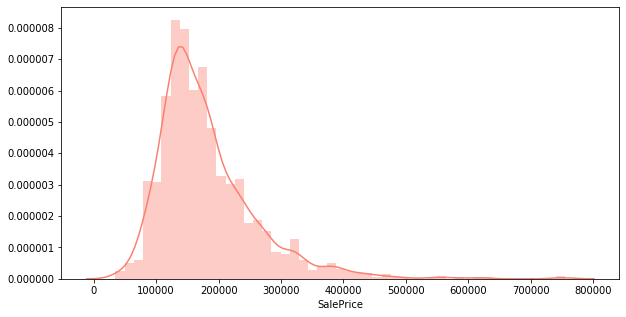

In [10]:
#Density value for sales price
plt.figure(figsize=(10,5))
sns.distplot(df_train['SalePrice'],color='salmon')

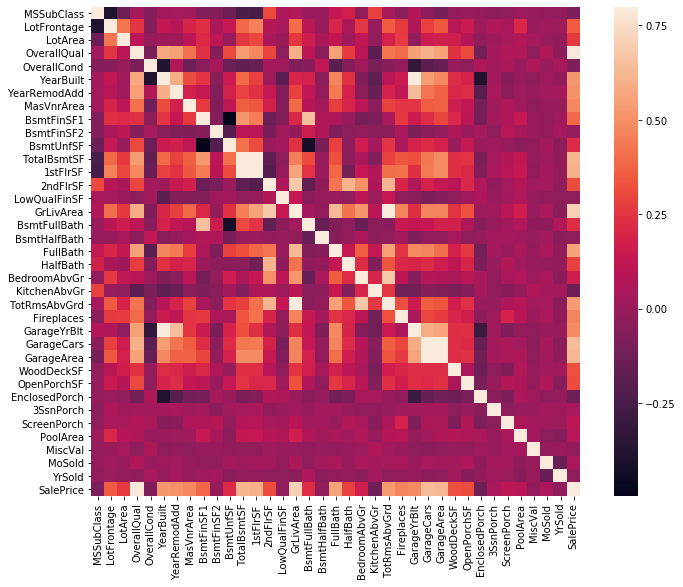

In [11]:
#Correltion matrix to find out the maximum correlation between features through heatmaps
corrmat=df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

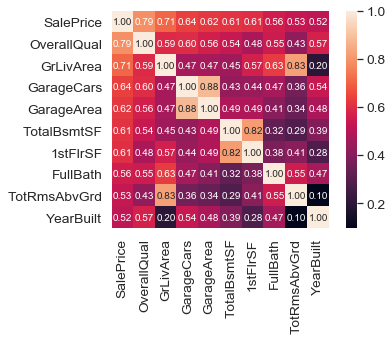

In [12]:
# Top ten most correlated features to sale price
k = 10 #number of variables for heatmap
c = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[c].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

In [13]:
#Most Correlated features
most_cor=pd.DataFrame(c)
most_cor

,0
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


# Feature Exploration

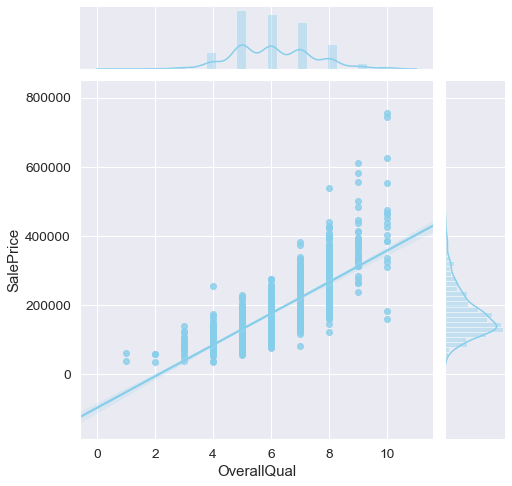

In [14]:
#OverallQual: Rates the overall material and finish of the house
sns.jointplot(x=df_train['OverallQual'], y=df_train['SalePrice'], kind='reg',color='skyblue',height=7)

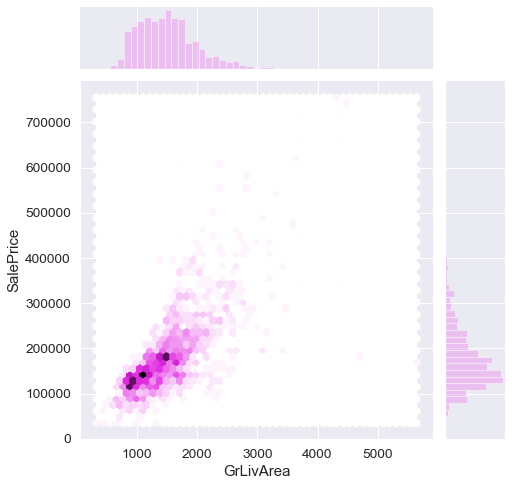

In [15]:
#GrLivArea: Above grade (ground) living area square feet
sns.jointplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], kind='hex',color='violet',height=7)

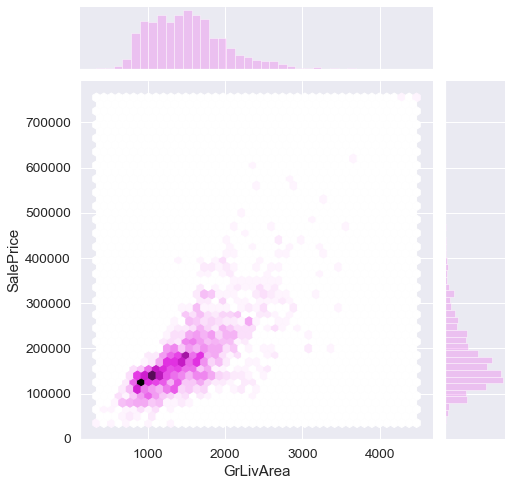

In [16]:
#Beyond 4000 there is a deviation or outlier from the normal observation of data.
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) 
                         & (df_train['SalePrice']<300000)].index).reset_index(drop=True)



sns.jointplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], kind='hex',color='violet',height=7
             )

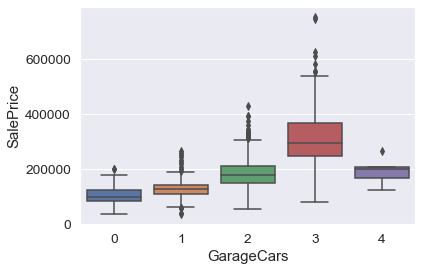

In [17]:
#GarageCars: Size of garage in car capacity
sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

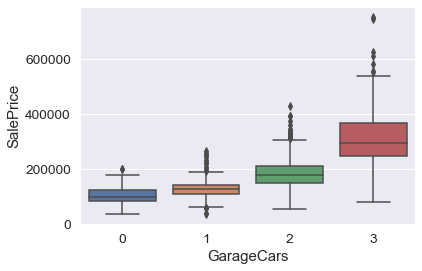

In [18]:
#Removing deviations
df_train = df_train.drop(df_train[(df_train['GarageCars']>3) 
                         & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

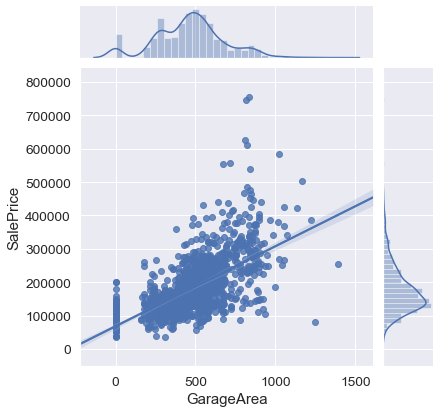

In [19]:
#GarageArea: Size of garage in square feet
sns.jointplot(x=df_train['GarageArea'], y=df_train['SalePrice'], kind='reg')

Seems clustered in the range of 0-1000 GarageArea

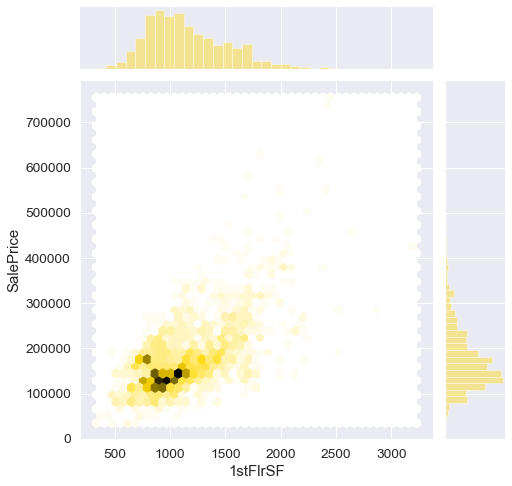

In [20]:
#TotalBsmtSF: Total square feet of basement area
#1stFlrSF: First Floor square feet
sns.jointplot(x=df_train['1stFlrSF'], y=df_train['SalePrice'], kind='hex',color='gold',height=7)

Seems clustered towards 1000

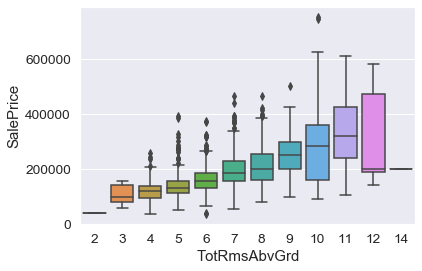

In [21]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
sns.boxplot(x=df_train['TotRmsAbvGrd'], y=df_train['SalePrice'])

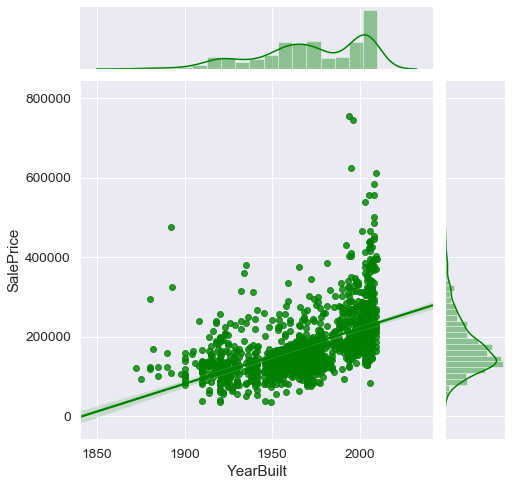

In [22]:
#YearBuilt: Original construction date
sns.jointplot(x=df_train['YearBuilt'], y=df_train['SalePrice'], kind='reg',color='green',height=7)

Recently built houses are more expensive

In [23]:
#Concatenating Test and Train Data
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
total=pd.concat((df_train,df_test)).reset_index(drop=True)
total.drop(['SalePrice'], axis=1, inplace=True)
print("Combined dataset size is : ",total.shape)


Combined dataset size is :  (2912, 79)


In [24]:
#Percentage of missing values according to which imputation and datacleaning can take place
totalnull=(total.isnull().sum())/len(total)*100
totalnull=totalnull.drop(totalnull[totalnull == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values' :totalnull})
missing_data

,Missing Values
PoolQC,99.690934
MiscFeature,96.394231
Alley,93.234890
Fence,80.425824
FireplaceQu,48.660714
LotFrontage,16.655220
GarageQual,5.460165
GarageCond,5.460165
GarageFinish,5.460165
GarageYrBlt,5.460165


Text(0.5, 1.0, 'Percent missing data by feature')

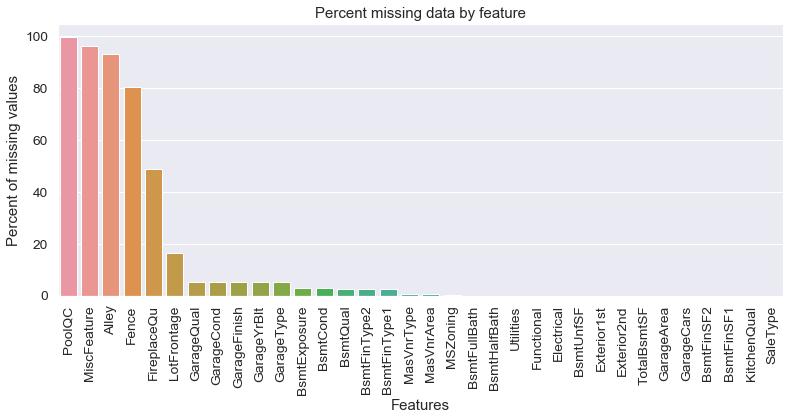

In [25]:
#Missing Data Percentage Visualization for Clarity
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=totalnull.index, y=totalnull)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Data imputation

In [26]:
#Since Neighbourhood and LotFrontage are highly correlated we will fill up lotFrontage's NAN using it
lot= total.groupby("Neighborhood")["LotFrontage"]
print(lot.median())

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.5
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64


In [27]:
train = pd.DataFrame(total[:ntrain])
test =pd.DataFrame(total[ntrain:])
train.loc[train.LotFrontage.isnull(),'LotFrontage']=train.groupby("Neighborhood").LotFrontage.transform('median')
test.loc[test.LotFrontage.isnull(),'LotFrontage']=test.groupby("Neighborhood").LotFrontage.transform('median')
total=pd.concat((train,test)).reset_index(drop=True)

print("Combined dataset size is : ",total.shape)

Combined dataset size is :  (2912, 79)


In [28]:
#Dropping some Columns which dont seem that important or signifant or have a history of many missing data   
total=total.drop(['MiscFeature','Alley','PoolQC','PoolArea'],axis=1)



In [29]:
#Assigning None to missing categorical values
total['Fence']=total['Fence'].fillna('None')
total['FireplaceQu']=total['FireplaceQu'].fillna('None')

In [30]:
#Filling other missing categorical and numerical data with 'None'(categorical) and 0(numerical).\ 
#For some features where we have selected categories we can use MODE to fill up the values
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total[col] = total[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total[col] = total[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total[col] = total[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total[col] = total[col].fillna('None')
total["MasVnrType"] = total["MasVnrType"].fillna("None")
total["MasVnrArea"] =total["MasVnrArea"].fillna(0)
total['MSZoning'] = total['MSZoning'].fillna(total['MSZoning'].mode()[0])
total["Functional"] = total["Functional"].fillna("Typ")
total['Electrical'] = total['Electrical'].fillna("SBrkr")
total['Utilities'] = total['Utilities'].fillna(total['Utilities'].mode()[0])
total['KitchenQual'] = total['KitchenQual'].fillna('TA')
total['Exterior1st'] = total['Exterior1st'].fillna(total['Exterior1st'].mode()[0])
total['Exterior2nd'] = total['Exterior2nd'].fillna(total['Exterior2nd'].mode()[0])
total['SaleType'] = total['SaleType'].fillna(total['SaleType'].mode()[0])
total['MSSubClass'] = total['MSSubClass'].fillna("None")

In [31]:
#These values can offer more as categorical features than numerical data,therefore we will be converting them to string

#It's the type of dwelling involved in the sale.
total['MSSubClass'] = total['MSSubClass'].apply(str)

#one-hot-encoding is more suitable for this feature
total['OverallCond'] = total['OverallCond'].astype(str)

#It's the year and month, so they should be convered into string
total['YrSold'] = total['YrSold'].astype(str)
total['MoSold'] = total['MoSold'].astype(str)


# Adding New Features

In [32]:
total['TotalSF'] = total['TotalBsmtSF'] + total['1stFlrSF'] + total['2ndFlrSF']
total['Bathrooms']=total['BsmtHalfBath']+total['BsmtFullBath']+total['HalfBath']+total['FullBath']
total['TotalSqu'] = (total['BsmtFinSF1'] + total['BsmtFinSF2'] +total['1stFlrSF'] + total['2ndFlrSF'])
total['2ndfloor'] = total['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
total['garage'] = total['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
total['Basement'] = total['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
total['Fireplace'] = total['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
total.select_dtypes(include=['object']).columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood',
       'OverallCond', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities', 'YrSold'],
      dtype='object')

In [34]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cat=[]
numeric = []
for i in total.columns:
    if total[i].dtype in numeric_dtypes:
        numeric.append(i)
    else:
        cat.append(i)
cat

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities',
 'YrSold']

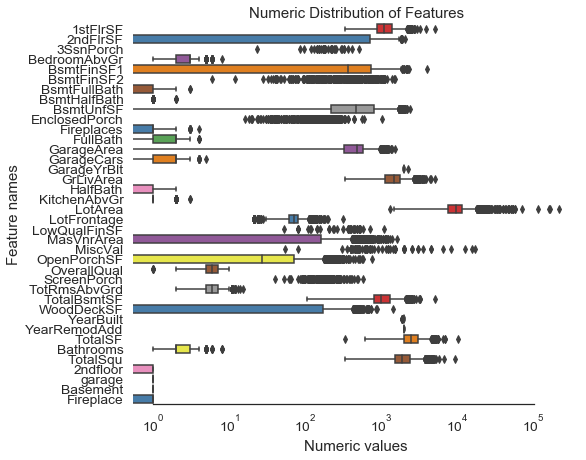

In [35]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=total[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [36]:
# Find skewed numerical features
skew_features = total[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.920854
LotArea          13.150188
LowQualFinSF     12.073977
3SsnPorch        11.362112
KitchenAbvGr      4.333199
BsmtFinSF2        4.140401
EnclosedPorch     4.008192
ScreenPorch       3.941117
BsmtHalfBath      3.940486
MasVnrArea        2.624021
dtype: float64

In [37]:
# Normalize skewed features
for i in skew_index:
    total[i] = boxcox1p(total[i], boxcox_normmax(total[i] + 1))
    
skew_features = total[skew_index].apply(lambda x: skew(x)).sort_values(ascending=False)   
skew_features.head(10)

3SsnPorch        8.854291
LowQualFinSF     8.485142
MiscVal          5.233200
KitchenAbvGr     3.802285
BsmtHalfBath     3.788582
ScreenPorch      3.149430
BsmtFinSF2       2.575480
EnclosedPorch    2.148767
MasVnrArea       0.978526
2ndFlrSF         0.895680
dtype: float64

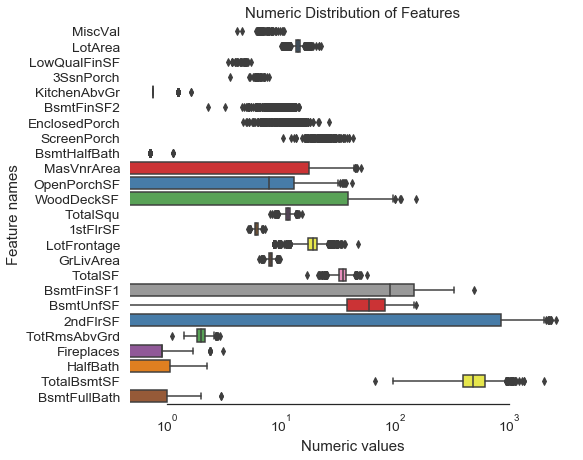

In [38]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=total[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

# Preprocessing

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1423    12.165985
1424    11.875838
1425    11.074436
1426    12.136192
1427    11.982935
1428    12.066816
1429    11.699413
1430    12.885673
1431    11.916395
1432    12.190964
1433    12.160034
1434    11.913720
1435    12.644331
1436    11.703554
1437    12.098493
1438    11.767575
1439    11.969724
1440    12.388398
1441    11.626263
1442    11.429555
1443    11.820418
1444    12.567555
1445    11.884496
1446    11.344519
1447    12

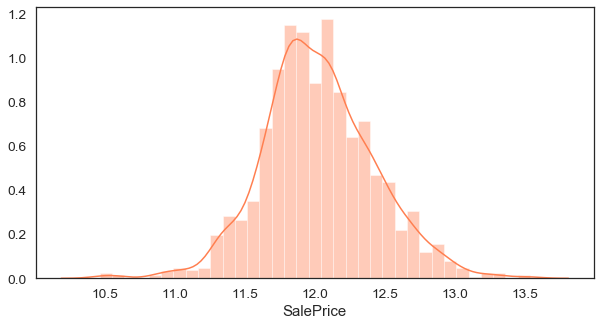

In [39]:
#Fixing Skewness:skew() function returns unbiased skew over requested axis Normalized by N-1. 
#Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
plt.figure(figsize=(10,5))
sns.distplot(df_train['SalePrice'],color='coral');
y_train = df_train['SalePrice']
y_train

In [40]:
print("Skewness: %f" % df_train['SalePrice'].skew())

Skewness: 0.123637


In [41]:
#Splitting data into train and test again
train = pd.DataFrame(total[:ntrain])
test =pd.DataFrame(total[ntrain:])
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,YearBuilt,YearRemodAdd,YrSold,TotalSF,Bathrooms,TotalSqu,2ndfloor,garage,Basement,Fireplace
1453,5.942161,0.000000,0.0,2,1Fam,TA,No,107.364247,7.767383,Rec,...,1961,1961,2010,31.215733,1.0,10.997958,0,1,1,0
1454,6.238739,0.000000,0.0,3,1Fam,TA,No,174.132719,0.000000,ALQ,...,1958,1958,2010,35.935212,2.0,11.878315,0,1,1,0
1455,5.968747,840.283998,0.0,3,1Fam,TA,No,156.036267,0.000000,GLQ,...,1997,1998,2010,35.453557,3.0,12.040220,1,1,1,1
1456,5.967113,811.841426,0.0,3,1Fam,TA,No,128.475470,0.000000,GLQ,...,1998,1998,2010,35.322614,3.0,11.832099,1,1,1,1
1457,6.210678,0.000000,0.0,2,TwnhsE,TA,No,71.096355,0.000000,ALQ,...,1992,1992,2010,35.468048,2.0,11.047331,0,1,1,0


In [118]:
#This function is the pipeline function to apply standard scaling to numerical features 
#and one hot encoding to categorical features
def classify(train_data,num_features,cat_features):
    _train_data = train_data.copy()
    #And the pipeline method can ensure the consistency of transformation
    num_transformers= Pipeline(steps=[  ('Scale', StandardScaler()) ] )
  
    cat_transformers= Pipeline(steps=[  ('cat_encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'))] ) 
    
    preprocess_pipeline = ColumnTransformer(
     transformers=[ ("numeric", num_transformers, num_features),("categorical", cat_transformers, cat_features)] )

    #Transformation here
    X_train = pd.DataFrame(preprocess_pipeline.fit_transform(_train_data))
    return [X_train,preprocess_pipeline]

newtrain=classify(train,numeric,cat)[0]
preprocess_pipeline=classify(train,numeric,cat)[1]
newtrain.head()



,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
0,-0.802132,1.165794,-0.12858,0.167733,0.728400,-0.351546,1.120327,-0.241875,-0.935209,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.434711,-0.790475,-0.12858,0.167733,1.217861,-0.351546,-0.819590,4.032838,-0.502731,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.570957,1.194175,-0.12858,0.167733,0.289983,-0.351546,1.120327,-0.241875,-0.112536,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.431484,0.934512,-0.12858,0.167733,-0.343402,-0.351546,1.120327,-0.241875,0.129402,3.227472,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.126494,1.638006,-0.12858,1.398623,0.630854,-0.351546,1.120327,-0.241875,0.018024,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
def get_transformer_feature_names(columnTransformer):
    output_features = []
    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features

column_names=get_transformer_feature_names(preprocess_pipeline)
newtrain.columns=column_names
newtrain.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.802132,1.165794,-0.12858,0.167733,0.728400,-0.351546,1.120327,-0.241875,-0.935209,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.434711,-0.790475,-0.12858,0.167733,1.217861,-0.351546,-0.819590,4.032838,-0.502731,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.570957,1.194175,-0.12858,0.167733,0.289983,-0.351546,1.120327,-0.241875,-0.112536,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.431484,0.934512,-0.12858,0.167733,-0.343402,-0.351546,1.120327,-0.241875,0.129402,3.227472,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.126494,1.638006,-0.12858,1.398623,0.630854,-0.351546,1.120327,-0.241875,0.018024,-0.396683,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,YearBuilt,YearRemodAdd,YrSold,TotalSF,Bathrooms,TotalSqu,2ndfloor,garage,Basement,Fireplace
1453,5.942161,0.000000,0.0,2,1Fam,TA,No,107.364247,7.767383,Rec,...,1961,1961,2010,31.215733,1.0,10.997958,0,1,1,0
1454,6.238739,0.000000,0.0,3,1Fam,TA,No,174.132719,0.000000,ALQ,...,1958,1958,2010,35.935212,2.0,11.878315,0,1,1,0
1455,5.968747,840.283998,0.0,3,1Fam,TA,No,156.036267,0.000000,GLQ,...,1997,1998,2010,35.453557,3.0,12.040220,1,1,1,1
1456,5.967113,811.841426,0.0,3,1Fam,TA,No,128.475470,0.000000,GLQ,...,1998,1998,2010,35.322614,3.0,11.832099,1,1,1,1
1457,6.210678,0.000000,0.0,2,TwnhsE,TA,No,71.096355,0.000000,ALQ,...,1992,1992,2010,35.468048,2.0,11.047331,0,1,1,0


In [46]:
newtest=classify(test,numeric,cat)[0]
preprocess_pipeline2=classify(test,numeric,cat)[1]
column_names2=get_transformer_feature_names(preprocess_pipeline2)
newtest.columns=column_names2
newtest.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.608876,-0.770500,-0.09447,-1.029543,0.250334,1.978348,-0.818489,-0.259878,-0.513713,-0.437353,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.593427,-0.770500,-0.09447,0.175997,1.099853,-0.364022,-0.818489,-0.259878,-0.150418,-0.437353,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.501098,0.878124,-0.09447,0.175997,0.869606,-0.364022,-0.818489,-0.259878,-0.955897,-0.437353,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.507720,0.822320,-0.09447,0.175997,0.518940,-0.364022,-0.818489,-0.259878,-0.361943,-0.437353,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.479669,-0.770500,-0.09447,-1.029543,-0.211115,-0.364022,-0.818489,-0.259878,1.063645,-0.437353,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
newtest.shape

(1459, 318)

In [48]:
# Define error metrics
kf = KFold(n_splits=5, random_state=42, shuffle=True)
def cv_rmse(model, X=train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=20, #by one time grid search
                       max_depth=5,  #by one time grid search
                       subsample=0.2,#by one time grid search
                       colsample_bytree=0.2,#by one time grid search
                       feature_fraction=0.2,#by one time grid search
                       feature_fraction_seed=42,
                       max_bin=200, 
                       verbose=-1,
                       random_state=42)
lightgbm_grid = {

                'classify__learning_rate':[0.01,0.1,0.5,1],
                'classify__n_estimators':[1000,3000,5000,7000]
                }

# XGBoost Regressor
xgboost = XGBRegressor(
                       max_depth=5,#by one time grid search
                       gamma=0.2,#by one time grid search
                       subsample=0.3,#by one time grid search
                       colsample_bytree=0.1,#by one time grid search
                       reg_alpha=0.01,#by one time grid search
                       objective='reg:linear',
                       nthread=16,
                       seed=42,

                       random_state=42)
xgboost_grid = {
               'classify__n_estimators':[1000,3000,5000,6000],
               'classify__learning_rate':[0.1,0.3,0.6,0.9],
             
              
               }

# Ridge Regressor

ridge_grid={'classify__alpha':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1, 5, 10, 15, 20, 30,50,100]}
ridge = Ridge(random_state=42)

# Lasso Regressor
Lasso_grid={'classify__alpha':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1, 5, 10, 15, 20, 30,50,100]}
lasso = Lasso(random_state=42)



#ElasticNetCV

ElasticNet_grid={'classify__alpha':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1, 5, 10, 15, 20, 30],'classify__l1_ratio':[0.1,0.3,0.5,0.7,0.9]}
Ela_net = ElasticNet(random_state=42)


# Support Vector Regressor
svr = SVR(gamma="auto")
svr_grid = {'classify__C':[0.1,0.5,1,3,5],'classify__epsilon':[0.01,0.05,0.1,0.15,0.2,0.3]}

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
                                max_features='sqrt',
                                loss='huber',
                                random_state=42)  

gbr_grid = {'classify__min_samples_split':[2,10,20,30,40,60], 'classify__max_depth':[2,4,6,8,10,15,20]}

# Random Forest Regressor
rf = RandomForestRegressor( n_estimators=1000,  #by one time grid search
                           max_depth=20,  #by one time grid search
                          max_features=None,
                          oob_score=True,
                          random_state=42)

rf_grid = {
           'classify__min_samples_split':[2,5],
           'classify__min_samples_leaf':[2,5]
          }


In [50]:
scores = {}

**Light Gradient Boosting Regressor**

In [51]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", lightgbm)])
lightgbm_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=lightgbm_grid,scoring="neg_root_mean_squared_error")
lightgbm_grid_model.fit(train,y_train)
score=-lightgbm_grid_model.best_score_
paras=lightgbm_grid_model.best_params_





In [52]:
print("lightgbm_score is:" +str(score))
print("lightgbm_parameters are:"+str(lightgbm_grid_model.best_params_))
scores['lightgbm'] = score


lightgbm_score is:0.11855969150063084
lightgbm_parameters are:{'classify__learning_rate': 0.01, 'classify__n_estimators': 1000}


In [53]:
#This is the final model for Light Gradient Boosting
new_lgbm  = LGBMRegressor(objective='regression', num_leaves=20,max_depth=5,learning_rate=0.01, n_estimators=1000,
                       subsample=0.2,colsample_bytree=0.2,feature_fraction=0.2,feature_fraction_seed=42,
                       max_bin=200, verbose=-1,random_state=42)

**XGBoost Regressor**

In [54]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", xgboost)])
xgboost_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=xgboost_grid,scoring="neg_root_mean_squared_error")
xgboost_grid_model.fit(train,y_train)
score=-xgboost_grid_model.best_score_
paras=xgboost_grid_model.best_params_



[15:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

In [55]:
print("xgboost_score is:" +str(score))
print("xgboost_parameters are:"+str(xgboost_grid_model.best_params_))
scores['xgboost_score'] = score


xgboost_score is:0.12446711143358899
xgboost_parameters are:{'classify__learning_rate': 0.1, 'classify__n_estimators': 5000}


In [56]:
#This is the final model for Xgboost
new_xgboost = XGBRegressor(
                       learning_rate=0.1,n_estimators=3000,max_depth=5,gamma=0.2,subsample=0.3,
                       colsample_bytree=0.1,reg_alpha=0.01,objective='reg:linear',nthread=16,
                       seed=42,random_state=42)

**SVR**

In [122]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", svr)])
svr_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=svr_grid,scoring="neg_root_mean_squared_error")
svr_grid_model.fit(train,y_train)
score=-svr_grid_model.best_score_
paras=svr_grid_model.best_params_


In [58]:
print("SVR_score is : {:.4f}".format(score))
print("SVR_parameters are:"+str(svr_grid_model.best_params_))
scores['SVR'] = score

SVR_score is : 0.1115
SVR_parameters are:{'classify__C': 3, 'classify__epsilon': 0.01}


**Ridge**

In [59]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", ridge)])
ridge_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=ridge_grid,scoring="neg_root_mean_squared_error")
ridge_grid_model.fit(train,y_train)
score=-ridge_grid_model.best_score_
paras=ridge_grid_model.best_params_




In [60]:
print("ridge_score is : {:.4f}".format(score))
print("ridge_parameters are:"+str(ridge_grid_model.best_params_))
scores['ridge'] = score

ridge_score is : 0.1119
ridge_parameters are:{'classify__alpha': 10}


In [61]:
#This is the final model for Ridge
new_ridge = Ridge(alpha=10,random_state=42)

**Lasso**

In [62]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", lasso)])
Lasso_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=Lasso_grid,scoring="neg_root_mean_squared_error")
Lasso_grid_model.fit(train,y_train)
score=-Lasso_grid_model.best_score_
paras=Lasso_grid_model.best_params_


In [63]:
print("lasso_score is : {:.4f}".format(score))
print("lasso_parameters are:"+str(Lasso_grid_model.best_params_))
scores['lasso'] = score

lasso_score is : 0.1137
lasso_parameters are:{'classify__alpha': 0.0001}


In [64]:
#This is the final model for lasso
new_lasso = Lasso(alpha=0.0001,random_state=42)

**Elastic Net**

In [65]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", Ela_net)])
ElasticNet_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=ElasticNet_grid,scoring="neg_root_mean_squared_error")
ElasticNet_grid_model.fit(train,y_train)
score=-ElasticNet_grid_model.best_score_
paras=ElasticNet_grid_model.best_params_




In [66]:
print("ElasticNet_score is : {:.4f}".format(score))
print("ElasticNet_parameters are:"+str(ElasticNet_grid_model.best_params_))
scores['ElasticNet'] = score
#

ElasticNet_score is : 0.1137
ElasticNet_parameters are:{'classify__alpha': 0.01, 'classify__l1_ratio': 0.1}


In [67]:
#This is the final model for Elastic Net
new_ElasticNet = ElasticNet(alpha=0.01,l1_ratio=0.1,random_state=42)

**Random Forest**

In [68]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", rf)])
rf_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=rf_grid,scoring="neg_root_mean_squared_error")
rf_grid_model.fit(train,y_train)
score=-rf_grid_model.best_score_
paras=rf_grid_model.best_params_




In [69]:
print("rf_score is : {:.4f}".format(score))
print("rf_parameters are:"+str(rf_grid_model.best_params_))
scores['rf'] = score


rf_score is : 0.1376
rf_parameters are:{'classify__min_samples_leaf': 2, 'classify__min_samples_split': 2}


In [70]:
#This is the final model for Random Forest
new_rf =  RandomForestRegressor( n_estimators=1000,min_samples_leaf=2, min_samples_split=2,max_depth=20, max_features=None,
                             oob_score=True,random_state=42)

**Gradient Boosting Regressor**

In [71]:
model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),("classify", gbr)])
gbr_grid_model=GridSearchCV(model_pipeline, cv=5, param_grid=gbr_grid,scoring="neg_root_mean_squared_error")
gbr_grid_model.fit(train,y_train)
score=-gbr_grid_model.best_score_
paras=gbr_grid_model.best_params_


In [72]:
print("gbr_score: {:.4f}".format(score))
print("gbr_parameters are:"+str(gbr_grid_model.best_params_))
scores['gbr'] = score
#The gridSearch CV shows that the max_depth should be 10 and min_samples_split should be 60

gbr_score: 0.1192
gbr_parameters are:{'classify__max_depth': 6, 'classify__min_samples_split': 60}


In [73]:
#This is the final model for gbr
new_gbr = GradientBoostingRegressor(max_features='sqrt',loss='huber',random_state=42,max_depth=10,min_samples_split=60)  

**Principal componenet regression**

To capture 95% of variance we need 89 synthetic features.


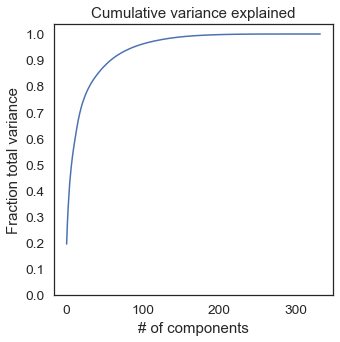

In [74]:
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

pca2 = PCA()
pca2.fit(newtrain)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
x  = range(1, 1 + cumsum.shape[0])  
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(x, cumsum)
ax.set_title("Cumulative variance explained")
ax.set_xlabel("# of components")
ax.set_ylabel("Fraction total variance")
ax.set_yticks( np.linspace(0,1,11)  )
cumsum2 = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum2 >= 0.95) + 1
print("To capture {f:d}% of variance we need {d:d} synthetic features.".format(f=95, d=d))


PCR_score is : 0.1141
PCR_component is :142


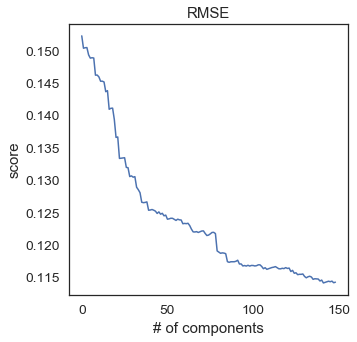

In [121]:

def pcr(X,y,pc):

# Define the PCA object
    pca = PCA()
# Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(X)[:,:pc]
    regr = linear_model.LinearRegression()
    regr.fit(Xreg, y)

# Cross-validation
    y_cv = -np.mean(cross_val_score(regr, Xreg, y, cv=10,scoring="neg_root_mean_squared_error"))

    return([regr, y_cv])

pca_score=[]
for i in range(1,150):
    score = pcr(newtrain,y_train, pc=i)[1]
    pca_score.append(score)
min_score=np.min(pca_score)
component=pca_score.index(min_score)+1
print("PCR_score is : {:.4f}".format(min_score))
print("PCR_component is :"+ str(component))

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(pca_score)
ax.set_title("RMSE")
ax.set_xlabel("# of components")
ax.set_ylabel("score")

scores["PCR"]=min_score

In [110]:
#This is the final model for PCR
new_pcr =  pcr(newtrain,y_train, pc=89)[0]


**Display RMSE for Different Model**

In [119]:
scores

{'lightgbm': 0.11855969150063084,
 'xgboost_score': 0.12446711143358899,
 'SVR': 0.11150408674754422,
 'ridge': 0.11186715491513302,
 'lasso': 0.11366246968661944,
 'ElasticNet': 0.11374021974139463,
 'rf': 0.13760336569331622,
 'gbr': 0.11918239869126013,
 'PCR': 0.11412370558352047}

**Prediction**

In [78]:
Prediction=pd.DataFrame(columns=["lightgbm","xgboost","svr","ridge","lasso","elastic_net","random_forest","gbr","pca"])

**Light Gradient Boosting Regressor**

In [79]:
predict1=lightgbm_grid_model.predict(test)
Prediction["lightgbm"]=np.exp(predict1)

**XGBoost Regressor**

In [80]:
predict2=xgboost_grid_model.predict(test)
Prediction["xgboost"]=np.exp(predict2)

**SVR**

In [81]:
predict3=svr_grid_model.predict(test)
Prediction["svr"]=np.exp(predict3)

**Ridge**

In [82]:
predict4=ridge_grid_model.predict(test)
Prediction["ridge"]=np.exp(predict4)

**Lasso**

In [83]:
predict5=Lasso_grid_model.predict(test)
Prediction["lasso"]=np.exp(predict5)

**Elastic Net**

In [84]:
predict6=ElasticNet_grid_model.predict(test)
Prediction["elastic_net"]=np.exp(predict6)

**Random Forest**

In [85]:
predict7=rf_grid_model.predict(test)
Prediction["random_forest"]=np.exp(predict7)

**Gradient Boosting Regressor**

In [86]:
predict8=gbr_grid_model.predict(test)
Prediction["gbr"]=np.exp(predict8)

**Principal component regression**

In [113]:
pca_test=PCA()
pca_test_data=pca_test.fit_transform(newtest)[:,:89]
predict9=new_pcr.predict(pca_test_data)
Prediction["pca"]=np.exp(predict9)

In [114]:
Prediction

,lightgbm,xgboost,svr,ridge,lasso,elastic_net,random_forest,gbr,pca
0,123268.563498,129650.453125,120796.171695,121952.295646,123658.019552,119384.944666,126655.659616,115828.542205,233162.385171
1,159526.632011,152127.625000,167599.602820,161909.633191,160069.347145,159070.016814,162357.349050,158992.301801,180389.460460
2,188061.088662,185222.390625,191341.919021,185573.737165,187288.391065,184403.285030,177992.771446,200335.011234,112491.603359
3,195891.362798,189907.078125,205255.862038,199922.103476,201467.142451,201692.748645,185265.309379,196252.919519,121321.660538
4,191860.892822,191780.234375,187474.613242,194016.333573,196226.112502,189686.605287,190705.890942,194706.235546,160939.485518
5,177750.224679,176089.687500,173980.810200,171257.093023,172021.728603,172998.206884,181332.013491,176532.633761,115373.439864
6,174714.616105,181535.265625,188380.995099,181297.428499,181736.118508,186343.889056,170006.275630,170248.471483,156082.778051
7,168049.802266,160429.375000,160638.459461,160800.132115,161994.688817,162095.305178,172044.983589,169126.008520,135730.656240
8,183422.204955,192466.234375,190009.427490,193696.599859,194066.676106,199582.267478,189223.915047,177672.216232,159734.549596
9,124764.430601,121130.781250,131838.066063,119163.842002,120574.582202,116776.362137,126278.550769,126764.532302,200101.434292


In [124]:
Prediction.to_csv("./Prediction.csv")


This is the result of prediction

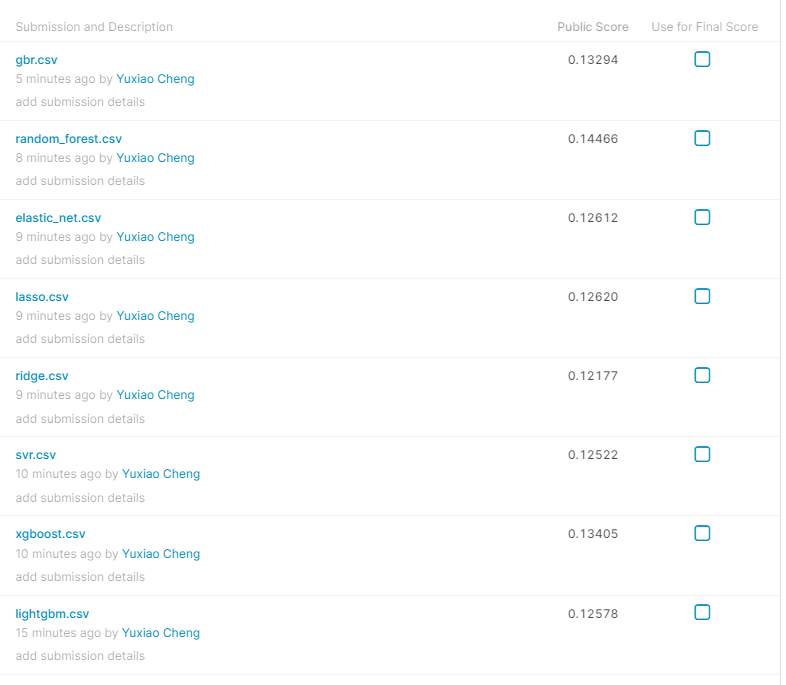

**Pick some models to check feature importance**

In [90]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))


We use feature importance method to which feature will affect the sales price effctively

**feature importance for GBR model**

In [91]:
gbr_perm_imp = permutation_importances(gbr_grid_model, train, y_train, r2)
gbr_perm_imp.head(10)

,Importance
Feature,
TotalSF,0.039977
OverallQual,0.032976
GrLivArea,0.027251
YearRemodAdd,0.015685
TotalSqu,0.012276
ExterQual,0.011408
1stFlrSF,0.010856
MSZoning,0.010691
OverallCond,0.010663


**feature importance for Random Forest model**

In [92]:
rf_perm_imp = permutation_importances(rf_grid_model, train, y_train, r2)
rf_perm_imp.head(10)

,Importance
Feature,
OverallQual,0.294888
TotalSF,0.265399
TotalSqu,0.088298
CentralAir,0.013486
YearRemodAdd,0.012488
LotArea,0.010057
YearBuilt,0.009814
GarageArea,0.008486
GrLivArea,0.007204


**feature importance for Elastic Net model**

In [93]:

ElaNet_perm_imp = permutation_importances(ElasticNet_grid_model, train, y_train, r2)
ElaNet_perm_imp.head(10)

,Importance
Feature,
OverallQual,0.095209
TotalSqu,0.033646
2ndFlrSF,0.026012
YearBuilt,0.021075
1stFlrSF,0.019082
LotArea,0.018074
TotalSF,0.016263
OverallCond,0.011939
YearRemodAdd,0.010892


**feature importance for SVR model**

In [94]:
SVR_perm_imp = permutation_importances(svr_grid_model, train, y_train, r2)
SVR_perm_imp.head(10)

,Importance
Feature,
OverallQual,0.039049
YearBuilt,0.037322
GrLivArea,0.027829
2ndFlrSF,0.027383
TotalSF,0.022194
LotArea,0.020887
TotalSqu,0.018227
OverallCond,0.016155
Neighborhood,0.013011


**Comment**

There are 3 features that appeard in all four models, which are OverallQual,, TotalSqu, TotalSF

And LotArea, GrLivArea, YearBuilt, OverallCond both appear in 3 models. 

The original 9 features are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt. 
They all have large correlations with the price. And we combined these features with the four models.


So we can conclude that OverallQual, YearBuilt, TotalSqu, TotalSF(include TotalBsmtSF,1stFlrSF and 2ndFlrSF), LotArea, GrLivArea, OverallCond are important features for sales price
